In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from RGBcubical_utils import compute_RGB_contributions, difference_RGB_ECP

from tqdm.notebook import tqdm

# load images

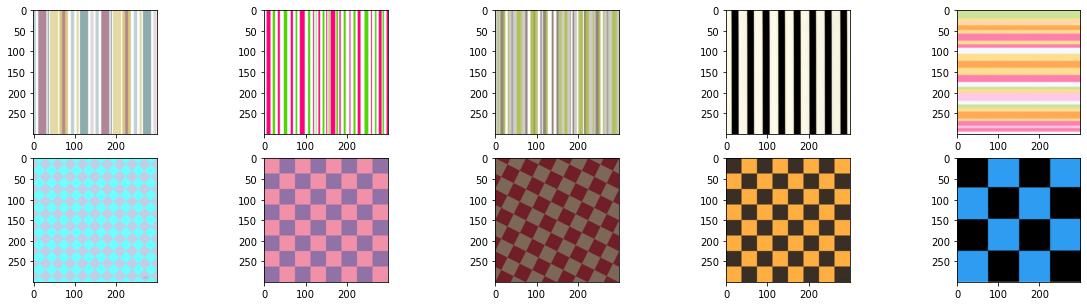

In [2]:
NUMBER_OF_SAMPLES = 5

images = []

for i in range(NUMBER_OF_SAMPLES):
    images.append(Image.open("data/textures/banded/banded_{}.jpg".format(i)))
    
for i in range(NUMBER_OF_SAMPLES):
    images.append(Image.open("data/textures/chequered/chequered_{}.jpg".format(i)))
    
np_images = [np.int16(img) for img in images]

fig, axs = plt.subplots(2, NUMBER_OF_SAMPLES,
                       figsize=(20, 5))

for i in range(NUMBER_OF_SAMPLES):
    axs[0, i].imshow(images[i])
    axs[1, i].imshow(images[NUMBER_OF_SAMPLES+i])

In [3]:
np_images[0].shape

(300, 300, 3)

# Compute RGB Euler profiles

In [4]:
list_of_RGB_contributions = [compute_RGB_contributions(img) for img in tqdm(np_images)]

  0%|          | 0/10 [00:00<?, ?it/s]

# Distance matrix

In [5]:
distance_matrix = np.zeros((NUMBER_OF_SAMPLES*2, NUMBER_OF_SAMPLES*2))

for i in tqdm(range(len(list_of_RGB_contributions))):
    for j in range(i+1, len(list_of_RGB_contributions)):
        distance_matrix[i,j] = difference_RGB_ECP(list_of_RGB_contributions[i], list_of_RGB_contributions[j])
        distance_matrix[j,i] = difference_RGB_ECP(list_of_RGB_contributions[j], list_of_RGB_contributions[i])

  0%|          | 0/10 [00:00<?, ?it/s]

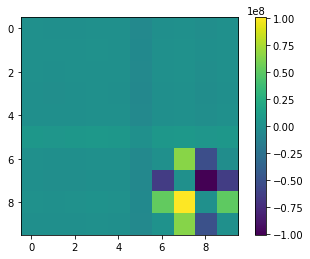

In [6]:
plt.imshow(distance_matrix)
plt.colorbar()